<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/nlp/%5BBank_Text_Classification%5D_TH2EN_EBL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data and Library Installation
Inspiration: https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

In [1]:
!pip install flair 
!pip install fairseq
!pip install pythainlp
!pip install transformers
!pip install sacremoses sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 7.3 MB/s 
     |████████████████████████████████| 4.4 MB 75.4 MB/s 
     |████████████████████████████████| 1.2 MB 69.0 MB/s 
     |████████████████████████████████| 1.6 MB 61.8 MB/s 
     |████████████████████████████████| 981 kB 81.4 MB/s 
     |████████████████████████████████| 788 kB 79.9 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 101 kB 10.0 MB/s 
     |████████████████████████████████| 19.7 MB 258 kB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 199 kB 59.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 6.6 MB 42.3 MB/s 
     |████████████████████████████████| 596 kB 48.9 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=be57f002bb43f0

In [2]:
#libraby 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import os, os.path
import pandas as pd
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from pythainlp.translate import Translate

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data

##Social FSI

In [3]:
#download data
#[Social FSI] raw
# !gdown :)
# !gdown :)

#[Social FSI] raw with translated
!gdown :)
!gdown :)

Downloading...
From: https://drive.google.com/uc?id=1hdmLmyVp_-MOmHBKWs4OukuxoyUFxW8X
To: /content/train_translated banking data.csv
100% 18.7M/18.7M [00:00<00:00, 84.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Cq3FttnnzZa-RK7vlu94bJTRj8YD6vA5
To: /content/test_translated banking data.csv
100% 18.7M/18.7M [00:00<00:00, 328MB/s]


In [4]:
train = pd.read_csv('/content/train_translated banking data.csv')
test = pd.read_csv('/content/test_translated banking data.csv')

In [5]:
train.shape, test.shape

((12150, 19), (12150, 19))

In [6]:
if train['Human_Category'].nunique() > test['Human_Category'].nunique():
  target_names = test['Human_Category'].unique()
  print("Train Unique Classes: ", train['Human_Category'].nunique(), "Test Unique Classes: ", test['Human_Category'].nunique())
  print("Target Name Classes: ", test['Human_Category'].nunique())
else: 
  print("Train Unique Classes: ", train['Human_Category'].nunique(), ", Test Unique Classes: ", test['Human_Category'].nunique())
  target_names = train['Human_Category'].unique()
  print("Target Name Classes: ", train['Human_Category'].nunique())

Train Unique Classes:  13 , Test Unique Classes:  13
Target Name Classes:  13


##KTB

In [3]:
# [KTB] raw
!gdown :)
!gdown :)

Downloading...
From: https://drive.google.com/uc?id=1DoSiTJb51nX-ofVDi6TbO7zLUqG00ajC
To: /content/Krungthai_Q202207_v1_1_single_train_sampling26088_20220421.xlsx
100% 3.41M/3.41M [00:00<00:00, 313MB/s]
Downloading...
From: https://drive.google.com/uc?id=12ePZ-fTziS4rJgb-D3axSeufcRYH3OKr
To: /content/Krungthai_Q202207_v1_1_single_test_sampling581_20220718.xlsx
100% 88.5k/88.5k [00:00<00:00, 91.7MB/s]


In [4]:
train = pd.read_excel('/content/Krungthai_Q202207_v1_1_single_train_sampling26088_20220421.xlsx')
test = pd.read_excel('/content/Krungthai_Q202207_v1_1_single_test_sampling581_20220718.xlsx')

In [134]:
train.shape, test.shape

((26088, 14), (581, 14))

In [ ]:
if train['Human_Category'].nunique() > test['Human_Category'].nunique():
  target_names = test['Human_Category'].unique()
  print("Train Unique Classes: ", train['Human_Category'].nunique(), "Test Unique Classes: ", test['Human_Category'].nunique())
  print("Target Name Classes: ", test['Human_Category'].nunique())
else: 
  print("Train Unique Classes: ", train['Human_Category'].nunique(), ", Test Unique Classes: ", test['Human_Category'].nunique())
  target_names = train['Human_Category'].unique()
  print("Target Name Classes: ", train['Human_Category'].nunique())

#Translation

In [5]:
th2en = Translate('th', 'en')

2022-07-21 02:30:35 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


Corpus: scb_1m_th-en_spm
- Downloading: scb_1m_th-en_spm 1.0


100%|██████████| 703780432/703780432 [00:44<00:00, 15922387.09it/s]
2022-07-21 02:31:29 | INFO | fairseq.file_utils | loading archive file /root/pythainlp-data/scb_1m_th-en_spm/SCB_1M-MT_OPUS+TBASE_th-en_spm-spm_32000-joined_v1.0/models
2022-07-21 02:31:29 | INFO | fairseq.file_utils | loading archive file /root/pythainlp-data/scb_1m_th-en_spm/SCB_1M-MT_OPUS+TBASE_th-en_spm-spm_32000-joined_v1.0/vocab
2022-07-21 02:31:33 | INFO | fairseq.tasks.translation | [th] dictionary: 29720 types
2022-07-21 02:31:33 | INFO | fairseq.tasks.translation | [en] dictionary: 29720 types
2022-07-21 02:31:34 | INFO | fairseq.models.fairseq_model | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': './checkpoints/1m-scb+mt-opus_27.5.2020/th-en/spm-spm/32000-joined/log', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False

In [6]:
train.head(1)

,TagFile,channel,Question,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,text_ws_local
0,KTBOpenendSummaryMonth08_YTD2020(NPS)_Detractor,Branch,NaN,499,Q2107_1,Q2107_1_1,อยากให้ Call Center รับสาย ติดต่อง่าย,อยากให้ Call Center รับสาย ติดต่อง่าย,Call Center,12,recommendation,r,อยากให้| |call| |center| |รับสาย| |ติดต่อ|ง่าย


In [8]:
test.head(1)

,TagFile,channel,Question,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,text_ws_local
0,Krungthai_Branch_TACallAPI20220401-20220630_Sa...,Branch,Q8,1001498Q8,Q2207_1,Q2207_1_1,สาขาควนขนุน ให้บริการดีมากๆๆแล้วค่ะ ดีใจที่ได้...,สาขาควนขนุน ให้บริการดีมากๆๆแล้วค่ะ,"Staff, Service and Take Ownership",5,positive,p,สาขา|ค|วน|ข|นุน| |ให้บริการ|ดี|มากๆ| |ๆ|แล้ว|ค...


In [25]:
#processing for 4 hours
train['translated'] = train['Text_original'].apply(lambda x: th2en.translate(str(x))) #2h40m46s
#If can't, ask pythainlp forum or discussion: https://github.com/PyThaiNLP/pythainlp/discussions

In [26]:
filename = 'translated_train_'

train.to_csv(filename + 'KTB')
train.head(5)

,TagFile,channel,Question,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,text_ws_local,translated
0,KTBOpenendSummaryMonth08_YTD2020(NPS)_Detractor,Branch,NaN,499,Q2107_1,Q2107_1_1,อยากให้ Call Center รับสาย ติดต่อง่าย,อยากให้ Call Center รับสาย ติดต่อง่าย,Call Center,12,recommendation,r,อยากให้| |call| |center| |รับสาย| |ติดต่อ|ง่าย,"I want Call Center on the phone, easy to reach."
1,KTBOpenendSummaryMonth08_YTD2020(NPS)_Detractor,Branch,NaN,590,Q2107_2,Q2107_2_1,อัตราดอกเบี้ยสินเชื่อแพง,อัตราดอกเบี้ยสินเชื่อแพง,"Product and Service, Benefit",14,negative,n,อัตราดอกเบี้ย|สินเชื่อ|แพง,Expensive lending rates.
2,KTBOpenendSummaryMonth08_YTD2020(NPS)_Detractor,Branch,NaN,591,Q2107_3,Q2107_3_1,ให้วงเงินสินเชื่อน้อย,ให้วงเงินสินเชื่อน้อย,"Product and Service, Term and Condition",16,negative,n,ให้|วงเงินสินเชื่อ|น้อย,Gives little credit.
3,KTBOpenendSummaryMonth08_YTD2020(NPS)_Detractor,Branch,NaN,592,Q2107_4,Q2107_4_1,อัตราดอกเบี้ยสินเชื่อถูกกว่า,อัตราดอกเบี้ยสินเชื่อถูกกว่า,"Product and Service, Benefit",14,positive,p,อัตราดอกเบี้ย|สินเชื่อ|ถูก|กว่า,The lending rate was cheaper.
4,KTBOpenendSummaryMonth08_YTD2020(NPS)_Detractor,Branch,NaN,593,Q2107_5,Q2107_5_1,ให้วงเงินสินเชื่อสูง,ให้วงเงินสินเชื่อน้อย,"Product and Service, Term and Condition",16,negative,n,ให้|วงเงินสินเชื่อ|น้อย,Gives a high credit.


In [27]:
test['translated'] = test['Text_original'].apply(lambda x: th2en.translate(str(x)))

In [28]:
filename = 'translated_test_'

test.to_csv(filename + 'KTB')
test.head(5)

,TagFile,channel,Question,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,text_ws_local,translated
0,Krungthai_Branch_TACallAPI20220401-20220630_Sa...,Branch,Q8,1001498Q8,Q2207_1,Q2207_1_1,สาขาควนขนุน ให้บริการดีมากๆๆแล้วค่ะ ดีใจที่ได้...,สาขาควนขนุน ให้บริการดีมากๆๆแล้วค่ะ,"Staff, Service and Take Ownership",5,positive,p,สาขา|ค|วน|ข|นุน| |ให้บริการ|ดี|มากๆ| |ๆ|แล้ว|ค...,Quan Kun is very well served. I'm glad I'm her...
1,Krungthai_Branch_TACallAPI20220401-20220630_Sa...,Branch,Q8,1001498Q8,Q2207_1,Q2207_1_2,สาขาควนขนุน ให้บริการดีมากๆๆแล้วค่ะ ดีใจที่ได้...,ดีใจที่ได้มาใช้บริการที่นี่เพราะใกล้บ้านและที่...,Accessibility,1,positive,p,ดีใจ|ที่|ได้มา|ใช้บริการ|ที่นี่|เพราะ|ใกล้บ้าน...,Quan Kun is very well served. I'm glad I'm her...
2,Krungthai_Branch_TACallAPI20220401-20220630_Sa...,Branch,Q8,1001661Q8,Q2207_2,Q2207_2_1,พนักงานน้อยเกินไป ทำให้ช้า,พนักงานน้อยเกินไป,Staff Management,9,negative,n,พนักงาน|น้อย|เกินไป|,Too few employees. Slow them down.
3,Krungthai_Branch_TACallAPI20220401-20220630_Sa...,Branch,Q8,1001661Q8,Q2207_2,Q2207_2_2,พนักงานน้อยเกินไป ทำให้ช้า,ทำให้ช้า,"Timing, Waiting Time and Queue Management",10,negative,n,ทำให้|ช้า,Too few employees. Slow them down.
4,Krungthai_Branch_TACallAPI20220401-20220630_Sa...,Branch,Q8,1003107Q8,Q2207_3,Q2207_3_1,ทุกอย่างถูกใจค่ะ,ทุกอย่างถูกใจค่ะ,No category,25,positive,p,ทุกอย่าง|ถูกใจ|ค่ะ,Everything likes it.


#Train Embedding Layer

In [7]:
train_docs = train['translated']
test_docs = test['translated']

In [8]:
#Encode each document as a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [9]:
#as each sentences contain different length of words, we need padding to make the sequences the same length before
#putting into the embedding layer
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytrain = np.array(train['Human_CategoryID'].tolist())

In [10]:
max_length

190

In [11]:
#do the same as train above for test
encoded_docs = tokenizer.texts_to_sequences(test_docs)
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytest = np.array(test['Human_CategoryID'].tolist())

In [12]:
#defind vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [13]:
#Count unique classes
print(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())

13 13


In [14]:
#Count unique classes
num_classes = max(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())
print(num_classes)

13


In [15]:
from tensorflow.keras.utils import to_categorical

#Multi class problems need one-hot encoding on y
#why - 1 on ytrain and ytest? can follow the linke below
#https://stackoverflow.com/questions/56204731/the-method-np-utils-to-categorical-give-me-an-error/59002957#59002957
ytrain =  to_categorical(ytrain-1, num_classes=num_classes)
ytest = to_categorical(ytest-1, num_classes=num_classes)

In [16]:
vocab_size = len(tokenizer.word_index)+1

#Model

##CNN LSTM GMP1D D13: 62

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(LSTM(50, return_sequences=True))

model.add(GlobalMaxPooling1D())
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 190, 100)          1153600   
                                                                 
 conv1d (Conv1D)             (None, 188, 32)           9632      
                                                                 
 lstm (LSTM)                 (None, 188, 50)           16600     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 13)                663       
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 19s 13ms/step - loss: 1.9636 - acc: 0.3442 - val_loss: 1.7720 - val_acc: 0.4276
Epoch 2/10
304/304 [==============================] - 3s 10ms/step - loss: 1.7085 - acc: 0.4520 - val_loss: 1.6945 - val_acc: 0.4588
Epoch 3/10
304/304 [==============================] - 3s 11ms/step - loss: 1.5387 - acc: 0.5245 - val_loss: 1.6434 - val_acc: 0.4934
Epoch 4/10
304/304 [==============================] - 3s 11ms/step - loss: 1.3857 - acc: 0.5803 - val_loss: 1.6477 - val_acc: 0.4844


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 2s 5ms/step - loss: 1.2977 - acc: 0.6121
Test Accuracy: 61.209875


##DO0.5 CNN1 CNN1 GMP1D D128 D13: 70


In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf

In [ ]:
#Inspiration: https://keras.io/examples/nlp/text_classification_from_scratch/

from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
model.add(Dropout(0.5))
model.add(Conv1D(128, 7 , padding='valid',strides=3, activation='relu'))
model.add(Conv1D(128, 7 , padding='valid',strides=3, activation='relu'))
#Among filters=[64,128,256], 128 is the best. 
#activation selu, tanh, relu, elu got similar results
model.add(GlobalMaxPooling1D()) #Among pooliing, GMP1D is the best.

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) #1 Dense better than 2 Denses
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 190, 1000)         11536000  
                                                                 
 dropout_6 (Dropout)         (None, 190, 1000)         0         
                                                                 
 conv1d_13 (Conv1D)          (None, 62, 128)           896128    
                                                                 
 conv1d_14 (Conv1D)          (None, 19, 128)           114816    
                                                                 
 global_max_pooling1d_9 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 6s 16ms/step - loss: 1.8928 - acc: 0.3631 - val_loss: 1.6569 - val_acc: 0.4790
Epoch 2/10
304/304 [==============================] - 5s 15ms/step - loss: 1.4899 - acc: 0.5287 - val_loss: 1.5495 - val_acc: 0.5045
Epoch 3/10
304/304 [==============================] - 5s 15ms/step - loss: 1.1613 - acc: 0.6331 - val_loss: 1.6488 - val_acc: 0.4893


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 2s 5ms/step - loss: 0.9521 - acc: 0.7016
Test Accuracy: 70.164609


In [ ]:
#prediction
y_pred = model.predict(Xtest)

In [ ]:
#Change one hot answer to be single digit as follows 
#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_labels_ypred = np.argmax(y_pred, axis=1)
rounded_labels_ytest = np.argmax(ytest,axis=1)

In [ ]:
#unique label ids and label names
target_names = {key-1:val for key, val in zip(train['Human_CategoryID'],train['Human_Category'])}

In [ ]:
target_names

{0: 'Accessibility',
 1: 'Facility',
 2: 'Company Brand',
 3: 'Staff Quality',
 4: 'Timing',
 5: 'Product and Service, Benefit',
 6: 'Product and Service, System',
 7: 'Product and Service, Usage and Condition',
 8: 'Product and Service, Convenience',
 9: 'Product and Service, Variety',
 10: 'Product and Service, Decision',
 11: 'Security',
 12: 'No Category'}

In [ ]:
target_names=   [ 
                'Accessibility',
                'Facility',
                'Company Brand',
                'Staff Quality',
                'Timing',
                'Product and Service, Benefit',
                'Product and Service, System',
                'Product and Service, Usage and Condition',
                'Product and Service, Convenience',
                'Product and Service, Variety',
                'Product and Service, Decision',
                'Security',
                'No Category'
                ]

##BIGRU CNN1 TDD GMP1D D13: 71

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM

from tensorflow.keras.layers import TimeDistributed, Bidirectional, GRU

In [ ]:
#Define our model

model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
#Bi-GRU with TimeDistributed by Tul 
model.add(Bidirectional(GRU(units=256,return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

model.add(Conv1D(128, 5 , activation='tanh'))
model.add(TimeDistributed(Dense(128, activation="relu")))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 190, 1000)         11536000  
                                                                 
 bidirectional (Bidirectiona  (None, 190, 512)         1932288   
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 186, 128)          327808    
                                                                 
 time_distributed (TimeDistr  (None, 186, 128)         16512     
 ibuted)                                                         
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 412s 1s/step - loss: 1.7343 - acc: 0.4276 - val_loss: 1.5156 - val_acc: 0.5025
Epoch 2/10
304/304 [==============================] - 382s 1s/step - loss: 1.3599 - acc: 0.5553 - val_loss: 1.5143 - val_acc: 0.4901
Epoch 3/10
304/304 [==============================] - 379s 1s/step - loss: 1.0850 - acc: 0.6364 - val_loss: 1.5760 - val_acc: 0.5099


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 48s 126ms/step - loss: 0.9011 - acc: 0.7150
Test Accuracy: 71.497941


In [ ]:
#Save the model
model.save('TH2EN_GRU.h5')

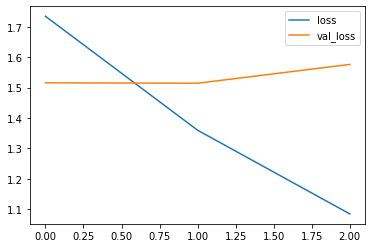

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

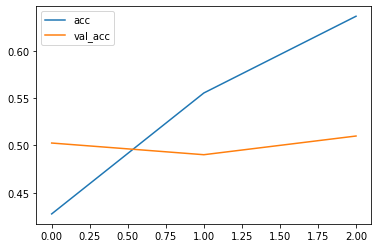

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

##BILSTM CNN1 TDD GMP1D D13: 71

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout

from tensorflow.keras.layers import TimeDistributed, Bidirectional, GRU, LSTM

In [ ]:
#Define our model

model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
#Bi-LSTM with TimeDistributed by Tul 
model.add(Bidirectional(LSTM(units=256,return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

model.add(Conv1D(128, 5 , activation='tanh'))
model.add(TimeDistributed(Dense(128, activation="relu")))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 190, 1000)         11536000  
                                                                 
 bidirectional_1 (Bidirectio  (None, 190, 512)         2574336   
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 186, 128)          327808    
                                                                 
 time_distributed_1 (TimeDis  (None, 186, 128)         16512     
 tributed)                                                       
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 593s 2s/step - loss: 1.7937 - acc: 0.4065 - val_loss: 1.5637 - val_acc: 0.4930
Epoch 2/10
304/304 [==============================] - 585s 2s/step - loss: 1.3829 - acc: 0.5537 - val_loss: 1.5073 - val_acc: 0.5066
Epoch 3/10
304/304 [==============================] - 581s 2s/step - loss: 1.0764 - acc: 0.6433 - val_loss: 1.5653 - val_acc: 0.5041


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 50s 131ms/step - loss: 0.8893 - acc: 0.7177
Test Accuracy: 71.769547


## CNN1 GMP1D D13: 79


In [17]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf

In [18]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
model.add(Conv1D(128, 10 , activation='relu'))
#Among filters=[64,128,256], 128 is the best. 
#kernel_size is better for 10.
#activation selu, tanh, relu, elu got similar results
model.add(GlobalMaxPooling1D()) #Among pooliing, GMP1D is the best.

model.add(Dense(num_classes, activation='softmax')) #1 Dense better than 2 Denses
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 190, 1000)         11536000  
                                                                 
 conv1d (Conv1D)             (None, 181, 128)          1280128   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 13)                1677      
                                                                 
Total params: 12,817,805
Trainable params: 12,817,805
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [20]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 16s 14ms/step - loss: 1.7182 - acc: 0.4362 - val_loss: 1.4963 - val_acc: 0.5136
Epoch 2/10
304/304 [==============================] - 4s 13ms/step - loss: 1.1907 - acc: 0.6107 - val_loss: 1.4525 - val_acc: 0.5111
Epoch 3/10
304/304 [==============================] - 4s 13ms/step - loss: 0.8160 - acc: 0.7571 - val_loss: 1.4860 - val_acc: 0.5235


In [21]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100)) #79.333335 (CNN filter = 10), 78 (CNN filter = 5)

380/380 [==============================] - 2s 5ms/step - loss: 0.6928 - acc: 0.7973
Test Accuracy: 79.728395


In [22]:
#prediction
y_pred = model.predict(Xtest)

In [23]:
#Change one hot answer to be single digit as follows 
#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_labels_ypred = np.argmax(y_pred, axis=1)
rounded_labels_ytest = np.argmax(ytest,axis=1)

##3CNN1 3DO0.1 3GP1D D256 D13: 81
inspiration: [click](https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/#:~:text=REPLY-,Francesco,-January%2025%2C%202018%20at%209%3A13) 

In [38]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed, concatenate
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf
import keras
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam

In [43]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(128, 6, activation='relu')(embedding1)
drop1 = Dropout(0.1)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(128, 8, activation='relu')(embedding2)
drop2 = Dropout(0.1)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(128, 10, activation='relu')(embedding3)
drop3 = Dropout(0.1)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)

# merge
merged = concatenate([pool1, pool2, pool3])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 190)]        0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 190, 1000)    11536000    ['input_4[0][0]']                
                                                                                                  
 embedding_11 (Embedding)       (None, 190, 1000)    11536000    ['input_4[0][0]']                
                                                                                                  
 embedding_12 (Embedding)       (None, 190, 1000)    11536000    ['input_4[0][0]']                
                                                                                            

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [45]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=128, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
76/76 [==============================] - 7s 79ms/step - loss: 1.7898 - acc: 0.4040 - val_loss: 1.5500 - val_acc: 0.5078
Epoch 2/10
76/76 [==============================] - 6s 75ms/step - loss: 1.2273 - acc: 0.5998 - val_loss: 1.4782 - val_acc: 0.5251
Epoch 3/10
76/76 [==============================] - 6s 75ms/step - loss: 0.8181 - acc: 0.7387 - val_loss: 1.4289 - val_acc: 0.5263
Epoch 4/10
76/76 [==============================] - 6s 75ms/step - loss: 0.5973 - acc: 0.8111 - val_loss: 1.4402 - val_acc: 0.5337


In [46]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 3s 8ms/step - loss: 0.5917 - acc: 0.8103
Test Accuracy: 81.028807


In [36]:
#MP1D2: acc = 71

# # create the model
# model = Sequential()
# inputs = Input(shape=(max_length,))

# # channel 1
# embedding1 = Embedding(vocab_size, 100)(inputs)
# conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
# drop1 = Dropout(0.5)(conv1)
# pool1 = MaxPooling1D(pool_size=2)(drop1)
# flat1 = Flatten()(pool1)
# # channel 2
# embedding2 = Embedding(vocab_size, 100)(inputs)
# conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
# drop2 = Dropout(0.5)(conv2)
# pool2 = MaxPooling1D(pool_size=2)(drop2)
# flat2 = Flatten()(pool2)
# # channel 3
# embedding3 = Embedding(vocab_size, 100)(inputs)
# conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
# drop3 = Dropout(0.5)(conv3)
# pool3 = MaxPooling1D(pool_size=2)(drop3)
# flat3 = Flatten()(pool3)

# # merge
# # merged = concatenate([pool1, pool2, pool3])
# merged = concatenate([flat1, flat2, flat3])

# # Fully connected 
# outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

# model = Model(inputs=[inputs], outputs=outputs)
# model.summary()

In [37]:
# #GMP1D: acc = 81

# # create the model
# model = Sequential()
# inputs = Input(shape=(max_length,))

# # channel 1
# embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
# conv1 = Conv1D(128, 6, activation='relu')(embedding1)
# drop1 = Dropout(0.1)(conv1)
# pool1 = GlobalMaxPooling1D()(drop1)
# # channel 2
# embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
# conv2 = Conv1D(128, 8, activation='relu')(embedding2)
# drop2 = Dropout(0.1)(conv2)
# pool2 = GlobalMaxPooling1D()(drop2)
# # channel 3
# embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
# conv3 = Conv1D(128, 10, activation='relu')(embedding3)
# drop3 = Dropout(0.1)(conv3)
# pool3 = GlobalMaxPooling1D()(drop3)

# # merge
# merged = concatenate([pool1, pool2, pool3])

# # Fully connected 
# outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

# model = Model(inputs=[inputs], outputs=outputs)
# model.summary()

#Plot Confusion and Classification Report

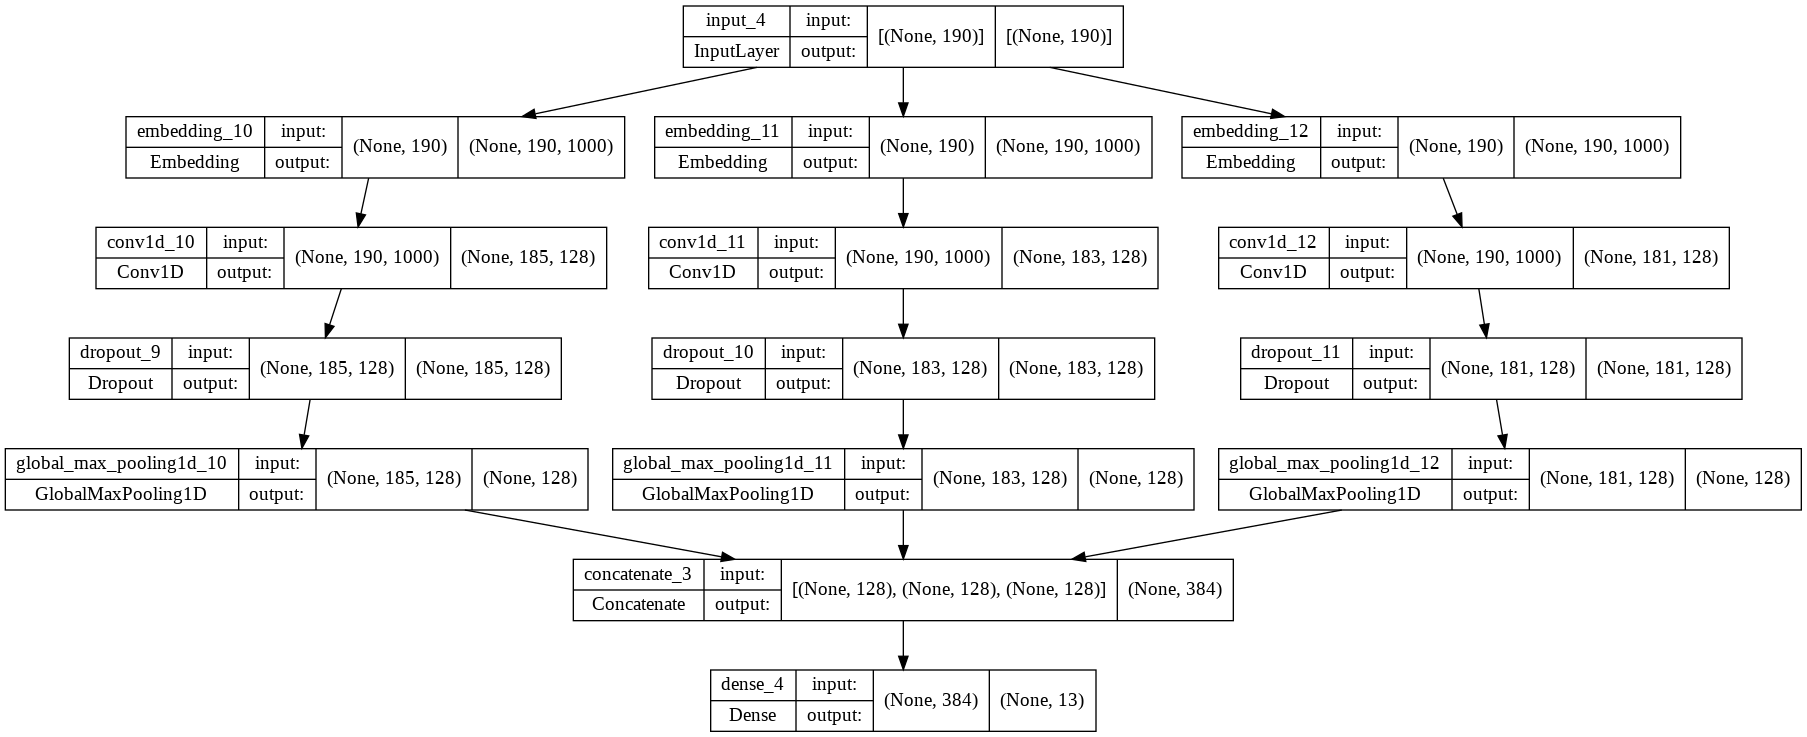

In [47]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# from google.colab import files
# files.download('model_plot.png')

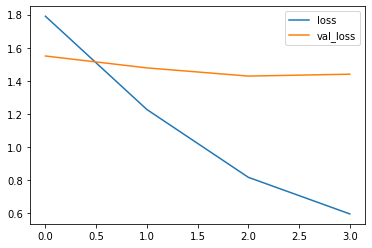

In [48]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

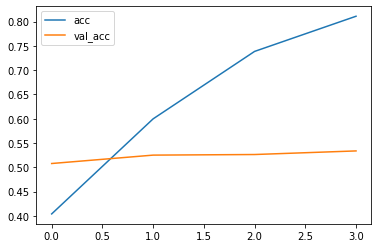

In [49]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [50]:
from sklearn.metrics import classification_report

print(classification_report(rounded_labels_ytest, rounded_labels_ypred, target_names=target_names))

                                          precision    recall  f1-score   support

Product and Service, Usage and Condition       0.82      0.55      0.66       185
                                Security       0.89      0.50      0.64        16
             Product and Service, System       0.71      0.63      0.67       377
                           Staff Quality       0.74      0.61      0.67       522
                             No Category       0.71      0.75      0.73      1163
                           Company Brand       0.79      0.76      0.77      1109
                                  Timing       0.86      0.87      0.87      3275
        Product and Service, Convenience       0.76      0.85      0.80      2454
            Product and Service, Benefit       0.69      0.59      0.64       153
                           Accessibility       0.86      0.62      0.72       379
            Product and Service, Variety       0.80      0.57      0.67       232
           Prod

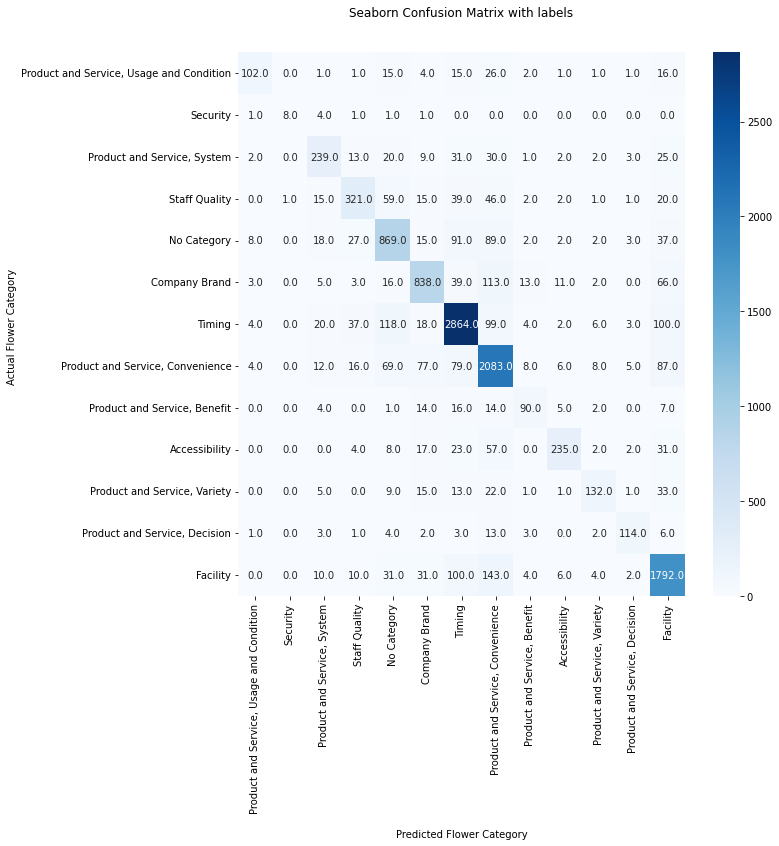

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(rounded_labels_ytest, rounded_labels_ypred)

fig, ax = plt.subplots(figsize=(10,10))    
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax, fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names, rotation=90)
ax.yaxis.set_ticklabels(target_names, rotation=0)

## Display the visualization of the Confusion Matrix.
plt.show()

figure = ax.get_figure()    
figure.savefig("cf_matrix.png", pad_inches= 12, dpi=400)

#Save Model

In [ ]:
#Save the model
model.save('my_model.h5')

In [ ]:
test['prediction'] = rounded_labels_ypred+1
test.to_excel('CNN_prediction.xlsx')

files.download('CNN_prediction.xlsx')

#Import Installed Library

In [ ]:
#Download all library in the code
!pip freeze > requirements.txt

In [ ]:
#Download library without colab libraries
from pip._internal.utils.misc import get_installed_distributions
import sys
#import numpy as np # imported to test whether numpy shows up, which it does!

def get_imported_packages():
    p = get_installed_distributions()
    p = {package.key:package.version for package in p}
    imported_modules = set(sys.modules.keys())
    imported_modules.remove('pip')
    modules = [(m, p[m]) for m in imported_modules if p.get(m, False)]
    return modules


def generate_requirements(filepath:str, modules):
    with open(filepath, 'w') as f:
        for module, version in modules:
            f.write(f"{module}=={version}\n")


generate_requirements('requirements.txt', get_imported_packages())